# Krishnan C S
## PG ID: 12420068

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # Split the data
from sklearn.tree import DecisionTreeClassifier # Decision tree
from sklearn.metrics import accuracy_score # Accuracy metric
from sklearn.tree import export_graphviz # Decision tree visualization.
import graphviz # Decision tree visualization.

## Load data

In [2]:
# Load the mushroom dataset
df_mushroom = pd.read_csv('mushrooms.csv')

In [3]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data preprocessing


In [4]:
# Perform one hot encoding for all the features
df_encoded = pd.get_dummies(df_mushroom)

## Split the data into train and test


In [5]:
# Split data into training and teset dataset
X = df_encoded.drop(['class_e', 'class_p'], axis=1)
y = df_encoded['class_p']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Build decision tree model

In [6]:
def tree_sweep(train, test,
               size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               purity = [60, 65, 70, 75, 80, 85, 90, 95]):
    """
    Trains decision trees with various max_leaf_nodes and min_impurity_decrease,
    and returns a list to store results.
    Input: Train data, test data, size, purity
    Output: List of dictionaries with results
    """
    results = []
    for s in size:
        for p in purity:
            # Instantiate and train the model
            dt_model = DecisionTreeClassifier(max_leaf_nodes=s, min_impurity_decrease=p/100.0, random_state=42)
            dt_model.fit(train[0], train[1])

            # Make predictions
            y_train_pred = dt_model.predict(train[0])
            y_test_pred = dt_model.predict(test[0])

            # Calculate accuracies
            train_accuracy = accuracy_score(train[1], y_train_pred)
            test_accuracy = accuracy_score(test[1], y_test_pred)

            # Store results
            results.append({
                'Size': s,
                'Purity': p,
                'Train_Accuracy': train_accuracy,
                'Test_Accuracy': test_accuracy
            })
    return results

In [7]:
# Run the decision tree sweep and save the results.
dt_accuracies = tree_sweep(train=(X_train, y_train), test=(X_test, y_test),
                           size = [2, 3, 4, 5, 10], purity=[2, 3, 4, 5, 10, 20, 50])
dt_accuracies_df = pd.DataFrame(dt_accuracies)
dt_accuracies_df.to_csv('tree_sweep.csv', index=False)
display(dt_accuracies_df)

,Size,Purity,Train_Accuracy,Test_Accuracy
0,2,2,0.891312,0.876128
1,2,3,0.891312,0.876128
2,2,4,0.891312,0.876128
3,2,5,0.891312,0.876128
4,2,10,0.891312,0.876128
5,2,20,0.891312,0.876128
6,2,50,0.518994,0.515587
7,3,2,0.948294,0.938474
8,3,3,0.948294,0.938474
9,3,4,0.948294,0.938474


* Note: A different set of hyperparameters was used to generate the table, because the given set produced the same value for all combinations.

In [8]:
# Build the simplest decision tree using the parameters which produce high test accuracy
dt_model = DecisionTreeClassifier(max_leaf_nodes=4, min_impurity_decrease=0.04, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9385


## Export and visualize the decision tree

Use graphviz to visualize the decision tree from the DOT file.


In [9]:
export_graphviz(
    dt_model,
    out_file='mushroom_tree.dot',
    feature_names=X_train.columns,
    class_names=['edible', 'poisonous'],
    filled=True,
    rounded=True,
    special_characters=True
)

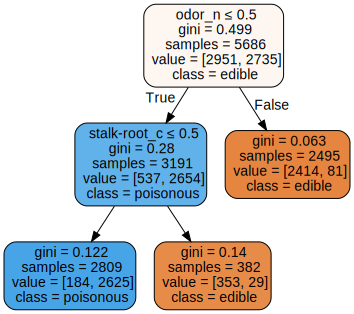

In [10]:
# Visualize the decision tree
with open("mushroom_tree.dot") as f:
    dot_graph = f.read()

src = graphviz.Source(dot_graph)
display(src)

### Rules
* Poisonous: Odor is not none, stalk-root is not club, stalk-surface-below-ring is not scaly.
* Edible:
  * Odor is none.
  * Odor is not none, stalk-root is club.
  * Odor is not none, stalk-root is not club, stalk-surface-below-ring is scaly.

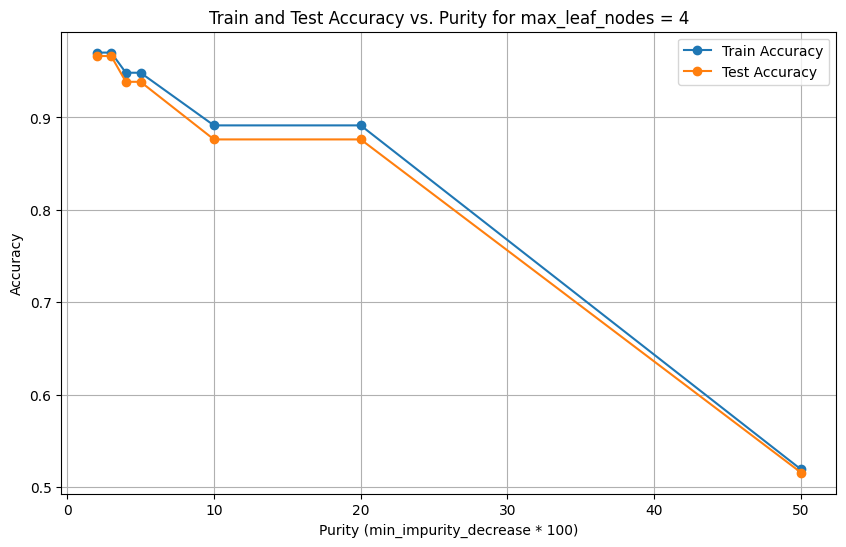

In [11]:
# Filter the DataFrame for size = 4
df_size_4 = dt_accuracies_df[dt_accuracies_df['Size'] == 4]

# Sort by purity for a clear plot
df_size_4 = df_size_4.sort_values('Purity')

# Plot train and test accuracy vs. Purity for size = 4
plt.figure(figsize=(10, 6))
plt.plot(df_size_4['Purity'], df_size_4['Train_Accuracy'], marker='o', label='Train Accuracy')
plt.plot(df_size_4['Purity'], df_size_4['Test_Accuracy'], marker='o', label='Test Accuracy')

plt.title('Train and Test Accuracy vs. Purity for max_leaf_nodes = 4')
plt.xlabel('Purity (min_impurity_decrease * 100)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

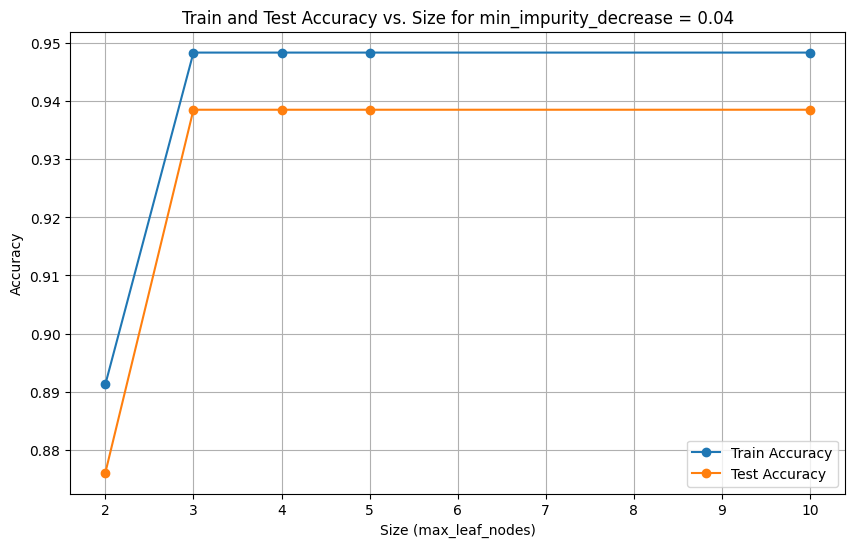

In [12]:
# Filter the DataFrame for purity = 4
df_purity_4 = dt_accuracies_df[dt_accuracies_df['Purity'] == 4]

# Sort by Size for a clear plot
df_purity_4 = df_purity_4.sort_values('Size')

# Plot train and test accuracy vs. Size for purity = 4
plt.figure(figsize=(10, 6))
plt.plot(df_purity_4['Size'], df_purity_4['Train_Accuracy'], marker='o', label='Train Accuracy')
plt.plot(df_purity_4['Size'], df_purity_4['Test_Accuracy'], marker='o', label='Test Accuracy')

plt.title('Train and Test Accuracy vs. Size for min_impurity_decrease = 0.04')
plt.xlabel('Size (max_leaf_nodes)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Summary
* The mushrooms were classified as poisonous or edible using a decision tree model.
* Even a small decision tree, with only 4 nodes, classified the mushrooms with 0.9385 accuracy.
* Accuracy is higher for bigger trees (more leaf nodes).
* Accuracy is higher when the mean impurity decrease is set to a smaller value.